# The Great British Bake-Off

#### Overview:

The data contains details of the first 10 seasons of the Great British Bake-Off. This includes details on Bake Type, Time allocated per challenge, Further Specifications per Bake in addition to Episode and Challenge Type.

#### Hypothesis:

Is it possible, in the absence of an objective 'difficulty' metric, to quantify if the Challenges on Bake-Off have gotten harder over the seasons?

#### Data-Preprocessing:

Initial EDA found a large number of null values in  both axes. Any row with >5 null values were dropped, any remaining columns with null values were filled with '0'. Individual imputations and adjustments are noted in the individual sections

#### Approachs: 

1. No. of pieces Baked - Have the number of pieces Baked per season increased?
2. Time per Bake - Have they reduced the total number of time given without changing the amount of items needed to be baked?
3. Have the bakes gotten more demanding?

#### Outcome:
Lists of what an aspiring Bake-off participant should know how to bake.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
 # Read Excel file with multiple sheets
xls = pd.read_excel("GBBO_dataset/Data_clean.xlsx", sheet_name=['Overview', 'Bake_Details'])

# Access individual sheets using sheet names
sheet1 = xls['Overview']
sheet2 = xls['Bake_Details']

In [3]:
overview_df = pd.DataFrame(sheet1) #Make data frame from excel sheet
print (overview_df.shape)
print (overview_df.head())
print (overview_df.isnull().sum())

(401, 9)
   Season  Episode No Bake Type Challenge Name  Time Allocated (Hrs)  \
0       1           1     Cakes      Signature                   3.0   
1       1           1     Cakes      Technical                   NaN   
2       1           1     Cakes    Showstopper                   NaN   
3       1           2  Biscuits      Signature                   2.0   
4       1           2  Biscuits      Technical                   1.0   

                    Bake Name  No. of Pieces Baked  Further Specs  \
0                    Any cake                   1.0           NaN   
1        Victoria Sponge Cake                   2.0           NaN   
2  Chocolate Celebration Cake                   1.0           NaN   
3         Personality Biscuit                   NaN           NaN   
4                      Scones                   NaN           NaN   

   Numer of applicants  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                 

In [4]:
#pre-processing - drop all rows with 5 NaN column values

overview_df.dropna(axis = 0, thresh = 5, inplace = True)
print (overview_df.shape)
overview_df.head(5)

(281, 9)


,Season,Episode No,Bake Type,Challenge Name,Time Allocated (Hrs),Bake Name,No. of Pieces Baked,Further Specs,Numer of applicants
0,1,1,Cakes,Signature,3.0,Any cake,1.0,NaN,NaN
1,1,1,Cakes,Technical,NaN,Victoria Sponge Cake,2.0,NaN,NaN
2,1,1,Cakes,Showstopper,NaN,Chocolate Celebration Cake,1.0,NaN,NaN
3,1,2,Biscuits,Signature,2.0,Personality Biscuit,NaN,NaN,NaN
4,1,2,Biscuits,Technical,1.0,Scones,NaN,NaN,NaN


In [5]:
#get overview of still missing values and fill them with 0

overview_df.columns = overview_df.columns.str.strip()
overview_df.isnull().sum()
overview_df = overview_df.fillna(0)
overview_df['No. of Pieces Baked'].head()

0    1.0
1    2.0
2    1.0
3    0.0
4    0.0
Name: No. of Pieces Baked, dtype: float64

### Approach 1: No of pieces baked

In [6]:
#Create new dataframe with grouped by season and challenge while summing the no. of bakes
grouped_1 = pd.DataFrame(overview_df.groupby(['Season','Challenge Name'], as_index=False)['No. of Pieces Baked'].sum())
grouped_1.head(5)

,Season,Challenge Name,No. of Pieces Baked
0,1,Showstopper,133.0
1,1,Signature,28.0
2,1,Technical,11.0
3,2,Showstopper,178.0
4,2,Signature,54.0


In [7]:
import seaborn as sns
import seaborn.objects as so

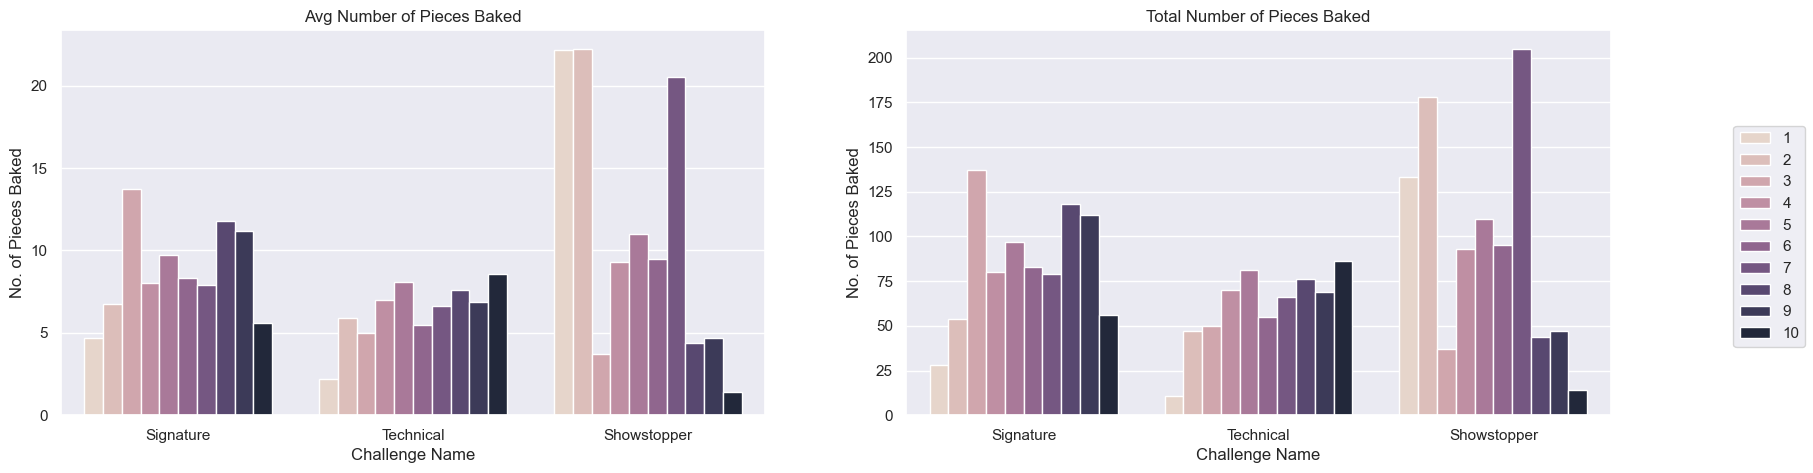

In [8]:
sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(ax=axs[0], data=overview_df,
            x='Challenge Name',
            y='No. of Pieces Baked',
            hue='Season',
            errorbar=None,
            palette="ch:s=-.4,r=.6")
axs[0].set_title('Avg Number of Pieces Baked')
axs[0].legend_.remove()
sns.barplot(ax=axs[1], data=grouped_1,
            x='Challenge Name',
            order=('Signature', 'Technical', 'Showstopper'),
            y='No. of Pieces Baked',
            hue='Season',
            errorbar=None,
            palette="ch:s=-.4,r=.6")
axs[1].set_title('Total Number of Pieces Baked')
axs[1].legend_.remove()

# Add a single legend to the figure
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

plt.show()

### 2: Time allocated per Bake Item

In [9]:
#Add new column that calculates time per baked item
overview_df2 = pd.DataFrame(sheet1)
overview_df2.dropna(axis = 0, thresh = 5, inplace = True) #reloading df as will dropna's differently
print (overview_df2.shape)
overview_df2.columns = overview_df2.columns.str.strip()
print (overview_df2.isnull().sum())

(281, 9)
Season                    0
Episode No                0
Bake Type                 0
Challenge Name            0
Time Allocated (Hrs)     16
Bake Name                 0
No. of Pieces Baked      11
Further Specs           116
Numer of applicants     278
dtype: int64


#### Method 1: Drops all 0 and inf values

In [10]:
overview_df2['Time_per_bake_in_Hrs'] =  overview_df2['Time Allocated (Hrs)'] / overview_df2['No. of Pieces Baked']
overview_df2 = overview_df2[overview_df2['Time_per_bake_in_Hrs']!=0] 
overview_df2 = overview_df2[overview_df2['Time_per_bake_in_Hrs']!= np.inf]

In [11]:
grouped_2 = pd.DataFrame(overview_df2.groupby(['Season','Challenge Name'], as_index=False)['Time_per_bake_in_Hrs'].sum())
grouped_2.head(5)

,Season,Challenge Name,Time_per_bake_in_Hrs
0,1,Showstopper,2.413194
1,1,Signature,11.604167
2,1,Technical,3.025000
3,2,Showstopper,6.750000
4,2,Signature,11.666667


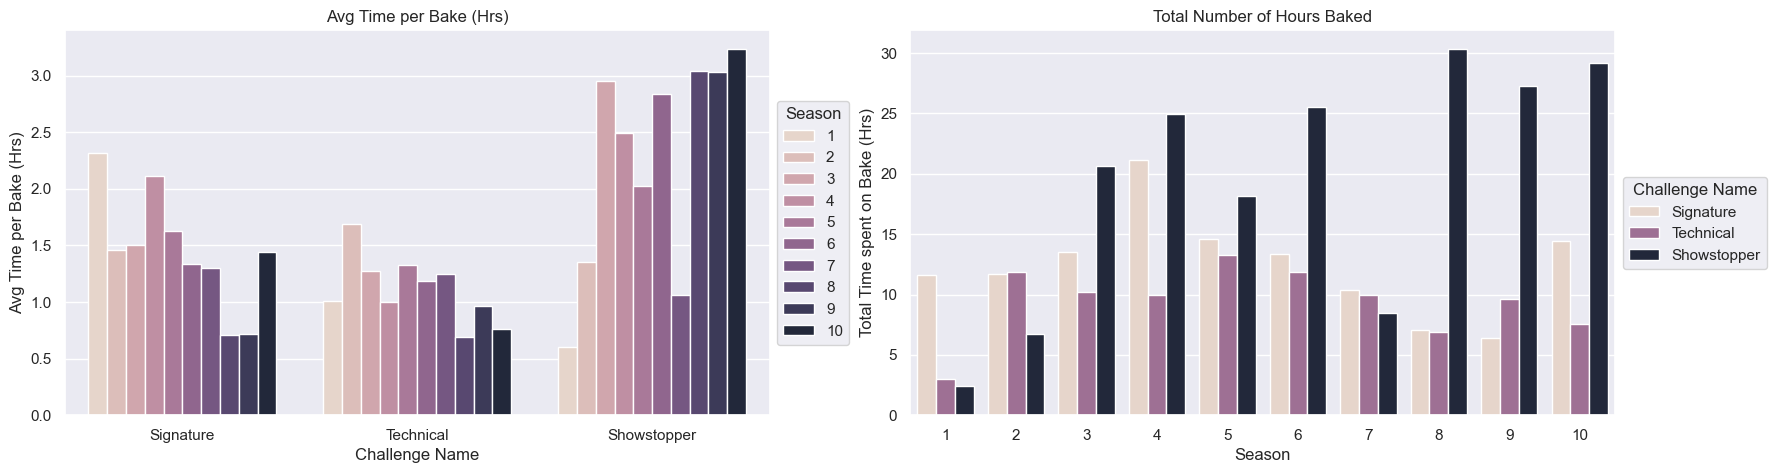

In [12]:
sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(ax=axs[0], data=overview_df2,
            x='Challenge Name',
            y='Time_per_bake_in_Hrs',
            hue='Season',
            errorbar=None,
            palette="ch:s=-.4,r=.6")
axs[0].set_title('Avg Time per Bake (Hrs)')
axs[0].set_ylabel('Avg Time per Bake (Hrs)')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Season')

sns.barplot(ax=axs[1], data=grouped_2, x='Season', y='Time_per_bake_in_Hrs', hue='Challenge Name', hue_order=('Signature', 'Technical', 'Showstopper'), dodge=True, errorbar=None, palette="ch:s=-.4,r=.6")
axs[1].set_title('Total Number of Hours Baked')
axs[1].set_ylabel('Total Time spent on Bake (Hrs)')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Challenge Name')

plt.show()

#### Method 2: Replace missing values in both columns with most freq 'No of Bakes' for that 'bake type'. However since the question requires looking at how values change over seasons doing this would not allow us to accurately answer the question.

### 3: Specifications for Bake

#### 3.1: Are there any further specs mentioned?

In [13]:
#To asnwer the first part I used np.where to get a binary value of if there was any further specs mentioned
overview_df3 = pd.DataFrame(sheet1)
overview_df3.dropna(axis = 0, thresh = 5, inplace = True) #reloading df as will dropna's differently
print ('Thee shape of this dataframe is:', overview_df3.shape)
overview_df3.columns = overview_df3.columns.str.strip()
print (overview_df3['Further Specs'].isnull())
overview_df3['Further Specs'].fillna('+', inplace= True)
print (overview_df3['Further Specs'])
overview_df3['Further Specs_Binary'] = np.where(overview_df3['Further Specs'].str.contains('+', regex=False), 0, 1)
print (overview_df3.columns)

Thee shape of this dataframe is: (281, 9)
0       True
1       True
2       True
3       True
4       True
       ...  
276    False
277    False
278    False
279    False
280    False
Name: Further Specs, Length: 281, dtype: bool
0                                                      +
1                                                      +
2                                                      +
3                                                      +
4                                                      +
                             ...                        
276    a French classic involving both choux and puff...
277    enclosing a display of pâtisserie or other lav...
278       rich in chocolate and be beautifully decorated
279                      twice-baked with lavash cracker
280    deceptive illusion picnic basket feast compose...
Name: Further Specs, Length: 281, dtype: object
Index(['Season', 'Episode No', 'Bake Type', 'Challenge Name',
       'Time Allocated (Hrs)', '

In [14]:
a = overview_df3[['Season','Episode No', 'Challenge Name']].loc[(overview_df3['Further Specs_Binary']) == 1]
a
#b = a['Season'].value_counts()
#b #Gives you numer of episodes per season

,Season,Episode No,Challenge Name
8,1,3,Showstopper
14,1,5,Showstopper
17,2,1,Signature
22,2,2,Showstopper
25,2,3,Showstopper
...,...,...,...
276,10,9,Technical
277,10,9,Showstopper
278,10,10,Signature
279,10,10,Technical


<Axes: xlabel='Season', ylabel='count'>

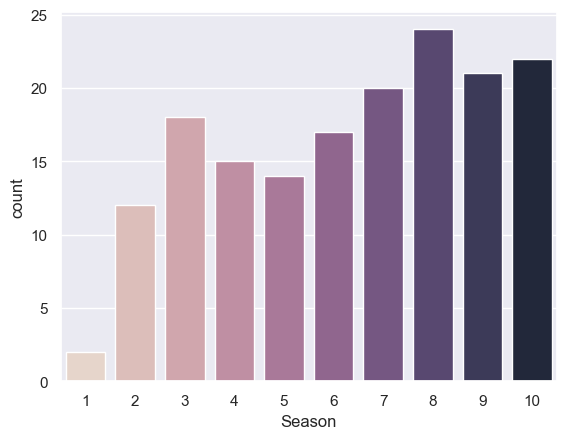

In [15]:
sns.countplot(a, x='Season', palette="ch:s=-.4,r=.6",)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


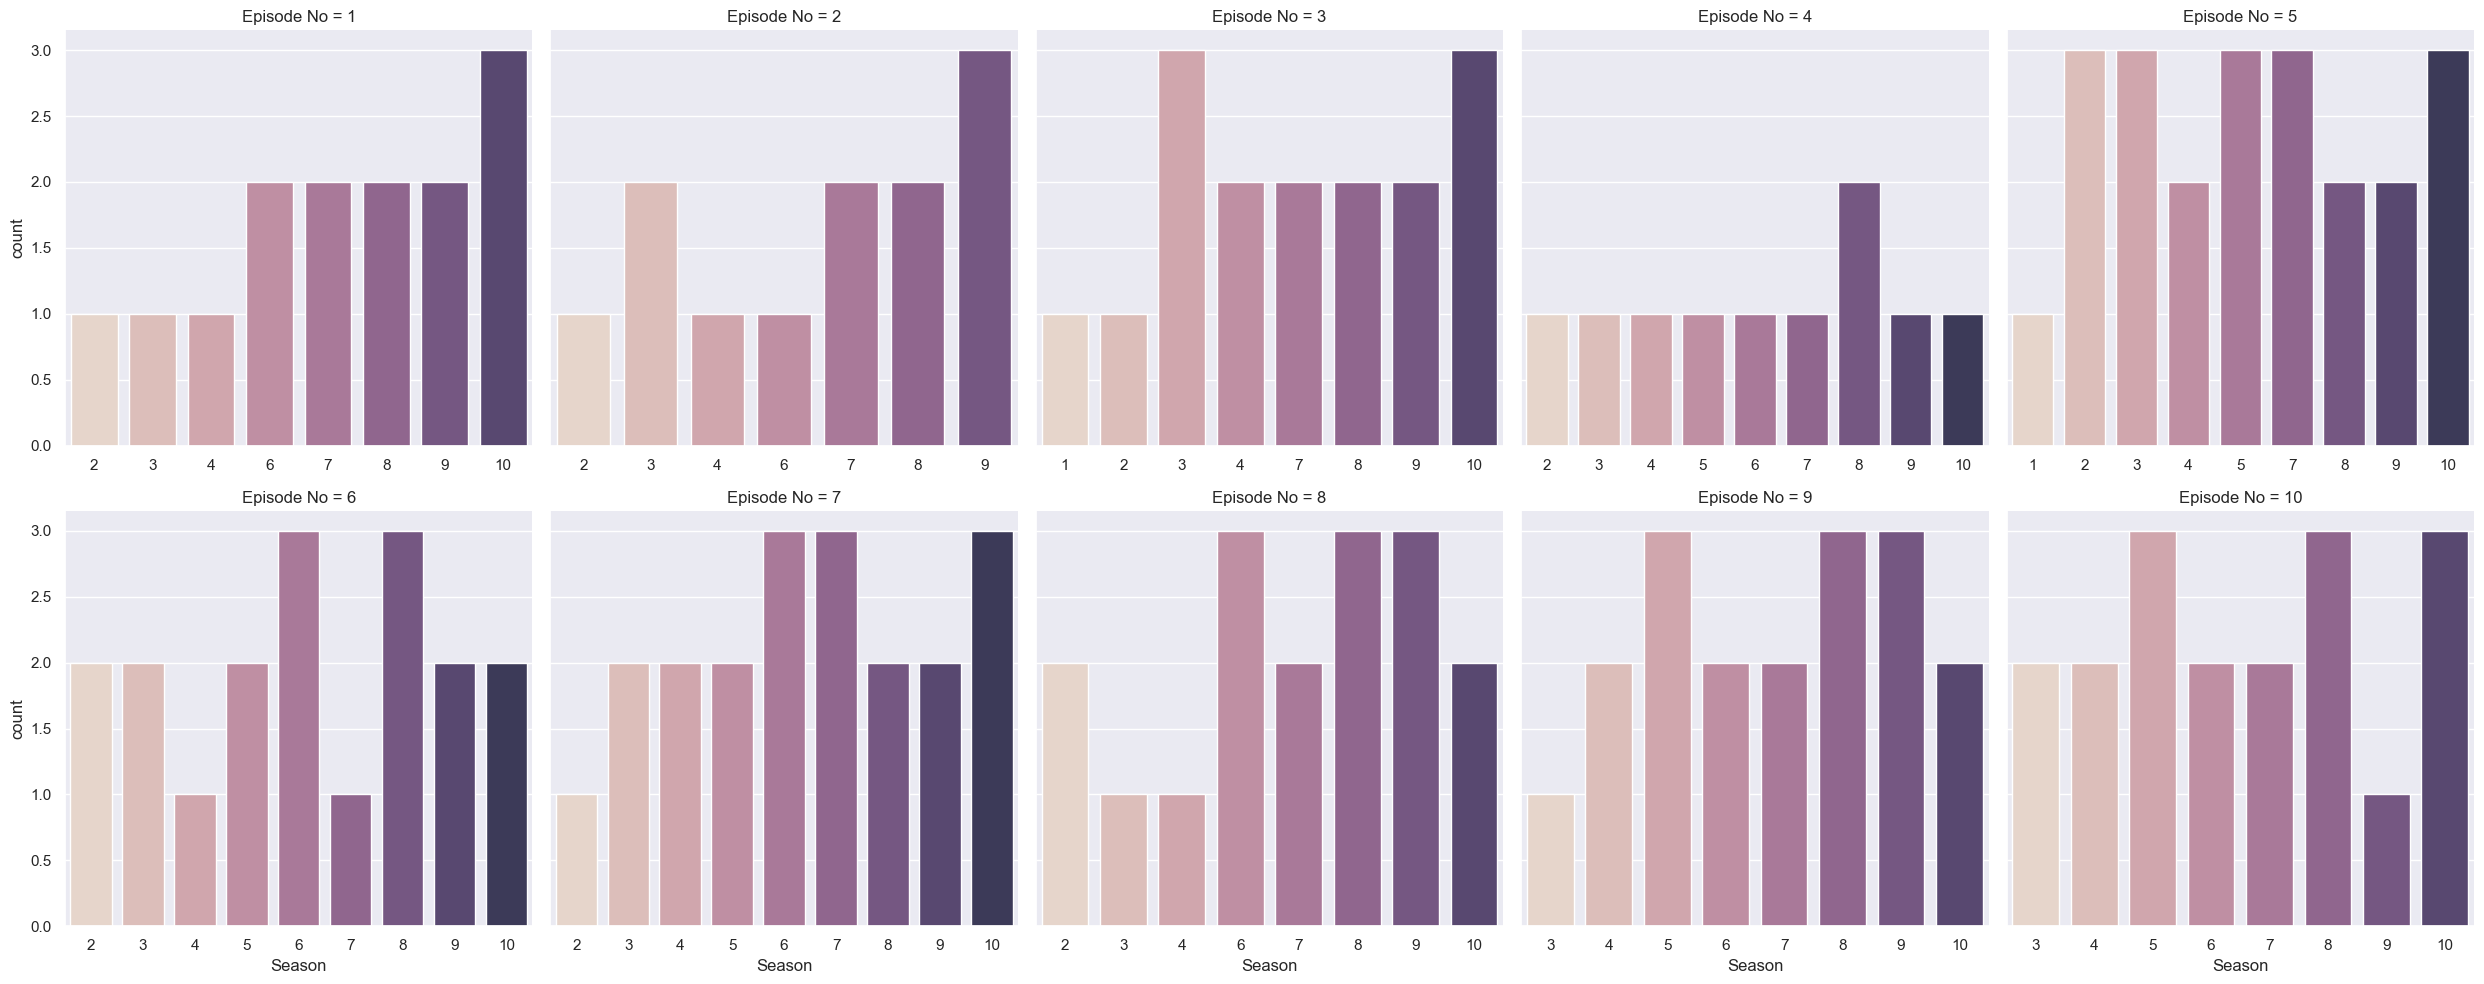

In [16]:
sns.catplot(a, col='Episode No', col_wrap=5, x='Season', palette="ch:s=-.4,r=.6", kind='count', sharex=False)

#### 3.2: Have the Further Specs gotten more demanding?

In [17]:
#To asnwer the second part i used a character length count to look at the change in average length of specs mentioned
overview_df3['Further Specs_Str_len'] = overview_df3['Further Specs'].str.len()
overview_df3[['Season','Episode No']].loc[(overview_df3['Further Specs_Str_len']) > 1] #This matches 'a' above and is a good sanity check.

,Season,Episode No
8,1,3
14,1,5
17,2,1
22,2,2
25,2,3
...,...,...
276,10,9
277,10,9
278,10,10
279,10,10


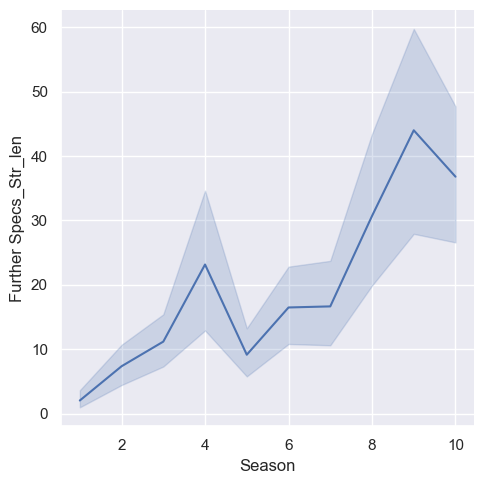

In [18]:
sns.relplot(overview_df3,
            x = 'Season',
            y = 'Further Specs_Str_len',
            kind = 'line'
)

### Take-Home: List of Bakes to be perfected for Potential Applicant

If you were to go on bake off, based on the number of occurences in Bake Name, Bake type and Further Specs what are the top 10 'Bakes' you need to know?

In [19]:


overview_df4 = overview_df3.loc[:, ['Bake Type', 'Bake Name', 'Further Specs']] #Make new dataframe with selected columns
overview_df4

,Bake Type,Bake Name,Further Specs
0,Cakes,Any cake,+
1,Cakes,Victoria Sponge Cake,+
2,Cakes,Chocolate Celebration Cake,+
3,Biscuits,Personality Biscuit,+
4,Biscuits,Scones,+
...,...,...,...
276,Pâtisserie,Gâteau Saint Honoré,a French classic involving both choux and puff...
277,Pâtisserie,Sugar Glass Display Case,enclosing a display of pâtisserie or other lav...
278,Final,Ultimate Chocolate Cake,rich in chocolate and be beautifully decorated
279,Final,Stilton Soufflés,twice-baked with lavash cracker


In [28]:
print (overview_df4['Bake Type'].value_counts().head(10))#Bake Type is easily answered with a simple vaue_counts and combining sub-categories (sweet dough is a part of bread etc)
overview_df4['Bake Type'].replace({'Sweet Dough':'Bread', 'Tarts':'Pastry', 'Pies':'Pastry', 'Biscuits and Traybakes':'Biscuits', 'Pies and Tarts':'Pastry' }, inplace=True)
print()
print(overview_df4['Bake Type'].value_counts().head(10))

Pastry                     42
Bread                      36
Cakes                      30
Biscuits                   30
Final                      29
Desserts                   24
Pâtisserie                 24
Puddings                    9
Alternative Ingredients     6
The Roaring Twenties        3
Name: Bake Type, dtype: int64

Pastry                     42
Bread                      36
Cakes                      30
Biscuits                   30
Final                      29
Desserts                   24
Pâtisserie                 24
Puddings                    9
Alternative Ingredients     6
The Roaring Twenties        3
Name: Bake Type, dtype: int64


In [29]:
overview_df4_split = overview_df4['Bake Name'].str.lower().str.split().explode()
print(overview_df4_split.value_counts().head(10))

cake         41
chocolate    16
pie          15
loaf         12
savoury      12
biscuit      10
sweet         9
and           9
bread         7
tart          7
Name: Bake Name, dtype: int64


In [43]:
overview_df4_split = overview_df4['Further Specs'].str.lower().str.split().explode()
print (overview_df4_split.value_counts().head(10)) #gives us lots of uninformative values like +, and, with etc, apply str len filter
a_1 = overview_df4_split[overview_df4_split.str.len() > 5]
print()
print(a_1.value_counts().head(10))

+         116
and        60
with       38
a          36
of         28
pastry     27
the        16
types      14
12         12
or         12
Name: Further Specs, dtype: int64
pastry       27
savoury       9
sponge        8
yeasted       8
chocolate     8
filled        7
flavours      7
different     6
custard       5
genoise       5
Name: Further Specs, dtype: int64
